In [1]:
import csv;
import os;
from datetime import datetime;
import numpy as np;
import matplotlib.pyplot as plt
import matplotlib

# variables
calculated_x = [];
calculated_y = [];
calculated_z = [];
calc_time = [];
actual_x = [];
actual_y = [];
actual_z = [];
actual_time = [];
calc_len = 0;
act_len = 0;

full = '';
full = 'full_';


# make list of our calculated x, y, z values
calculated_file = open(full+'calc_distances.csv', 'r');
calculated_reader = csv.reader(calculated_file);

for row in calculated_reader:
    calculated_x.append(float(row[0]));
    calculated_y.append(float(row[1]));
    calculated_z.append(float(row[2]));
    temp_time = row[3].split(' ')[1]    #
    temp_time = temp_time.split(":");
    calc_time.append(int(temp_time[0])*3600 + int(temp_time[1])*60 + float(temp_time[2]));
    #calc_time.append(datetime.strptime(row[3].split(' ')[1], '%H:%M:%S.%f'));
    
calculated_file.close();

calc_len = len(calculated_x);

calculated_x = np.asarray(calculated_x);
calculated_y = np.asarray(calculated_y);
calculated_z = np.asarray(calculated_z);

# make list of actual x, y, z values
actual_file = open(full+'real_distances.csv', 'r');
actual_reader = csv.reader(actual_file);

for row in actual_reader:
    actual_x.append(float(row[0]));
    actual_y.append(float(row[1]));
    actual_z.append(float(row[2]));
    temp_time = row[3].split(' ')[1]   #
    temp_time = temp_time.split(":");
    actual_time.append(int(temp_time[0])*3600 + int(temp_time[1])*60 + float(temp_time[2]));
    #actual_time.append(datetime.strptime(row[3].split(' ')[1], '%H:%M:%S'));
    
actual_file.close();

act_len = len(actual_x);

actual_x = np.asarray(actual_x);
actual_y = np.asarray(actual_y);
actual_z = np.asarray(actual_z);

# test print
print("Calculated Sets: " + str(calc_len));
print("Actual Sets: " + str(act_len));
print(calc_time[0])

# -*- coding: utf-8 -*-

#actual_time = [t - offset for t in actual_time];
#calc_time = [t - offset for t in calc_time];

# align t axis
offset = min(actual_time);
for t in range(len(actual_time)):
    actual_time[t] -= offset;

offset = min(calc_time);
for t in range(len(calc_time)):
    calc_time[t] -= offset;


Calculated Sets: 1008
Actual Sets: 8109
44188.633424


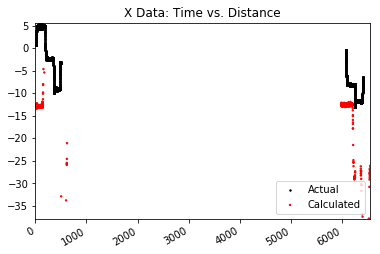

In [7]:
"""
Plot calculated vs. actual X locations
"""

fig = plt.figure()


plt.scatter(actual_time, actual_x, c='Black', s=2);
plt.scatter(calc_time, calculated_x, s=2, facecolors='none', edgecolors='r');

plt.gcf().autofmt_xdate();

plt.title('X Data: Time vs. Distance')
plt.legend(('Actual', 'Calculated'), loc='lower right')

# min and max values will be global min and max
plt.xlim(min(min(actual_time), min(calc_time)), max(max(actual_time), max(calc_time)))
plt.ylim(min(min(actual_x), min(calculated_x)), max(max(actual_x), max(calculated_x)))

plt.show();

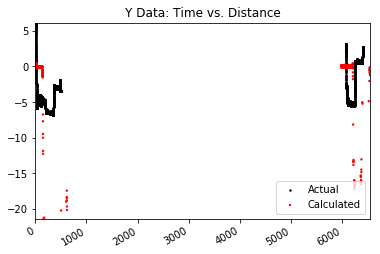

In [8]:
"""
Plot calculated vs. actual Y locations
"""

fig = plt.figure()

plt.scatter(actual_time, actual_y, c='Black', s=2);
plt.scatter(calc_time, calculated_y, s=2, facecolors='none', edgecolors='r');

plt.gcf().autofmt_xdate();

plt.title('Y Data: Time vs. Distance')
plt.legend(('Actual', 'Calculated'), loc='lower right')

plt.xlim(min(min(actual_time), min(calc_time)), max(max(actual_time), max(calc_time)))
plt.ylim(min(min(actual_y), min(calculated_y)), max(max(actual_y), max(calculated_y)))

plt.show();

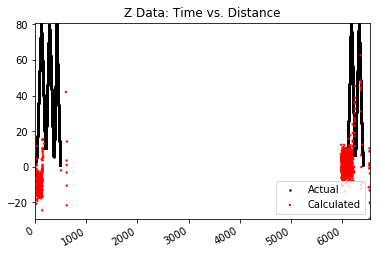

In [9]:
"""
Plot calculated vs. actual Z locations
"""

fig = plt.figure()

plt.scatter(actual_time, actual_z, c='Black', s=2);
plt.scatter(calc_time, calculated_z, s=2, facecolors='none', edgecolors='r');

plt.gcf().autofmt_xdate();

plt.title('Z Data: Time vs. Distance')
plt.legend(('Actual', 'Calculated'), loc='lower right')

plt.xlim(min(min(actual_time), min(calc_time)), max(max(actual_time), max(calc_time)))
plt.ylim(min(min(actual_z), min(calculated_z)), max(max(actual_z), max(calculated_y)))

plt.show();